In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read train and test data and split them
df = pd.read_csv('data/Train.csv')
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [5]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [6]:
# Check for duplicates
df.duplicated().sum()

0

No duplicated labels

In [7]:
df.dtypes.value_counts()

object     10
float64     5
int64       3
dtype: int64

<br> 
10 Columns have String type <br>
6  Columns have Float  type <br>
2  Columns have Int    type <br>

<br><br>

## Columns Analysis

### Id

Feature description:<br>
- Unique identifier for each sample in the dataset. Cannot be used for modelling

In [8]:
df.id.head()

0    id_43823
1    id_32289
2    id_10523
3    id_43951
4    id_40992
Name: id, dtype: object

In [9]:
# Check type of the columns
df.id.dtype

dtype('O')

In [10]:
df.id.duplicated().sum()

0

### Conclusion
- Object dtype
- Have not duplicated
- Cannot be used for modeling

In [11]:
df.drop(columns = ['id'], inplace = True)
df

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


<br><br><br>

### Customer Age

Feature description
- Age of the Customer in years

In [12]:
# Head
df.customer_age.head()

0    28.0
1    34.0
2    46.0
3    34.0
4    41.0
Name: customer_age, dtype: float64

In [13]:
# Describtion : most important values
df.customer_age.describe()

count    31028.000000
mean        40.439216
std         10.751392
min         18.000000
25%         32.000000
50%         39.000000
75%         48.000000
max         97.000000
Name: customer_age, dtype: float64

In [14]:
# NaN values
df.customer_age.isnull().sum()

619

<AxesSubplot:>

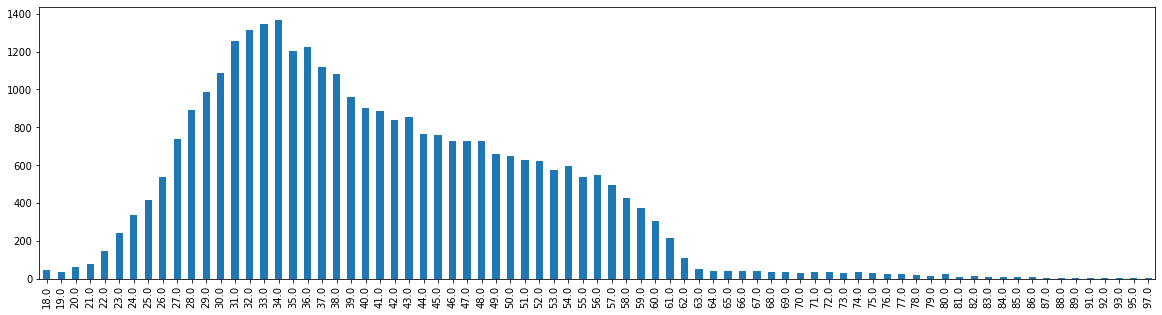

In [15]:
df.customer_age.value_counts().sort_index().plot(kind='bar', figsize=(20,5))

<AxesSubplot:ylabel='Density'>

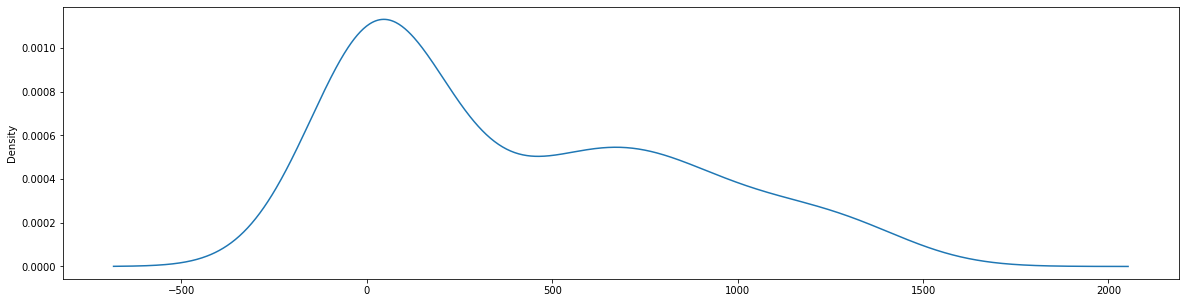

In [16]:
df.customer_age.value_counts().sort_index().plot(kind='density', figsize=(20,5))

### Conclusions:
- The columns customer age have 889 NaN values
- The data have not non-logical values (0 < age 140)
- Most of the customers have 30-40 years
- The customers are minimum 18 years old 

<br><br>

### Job type

Feature description: <br>
- Type of job of the customer

In [17]:
# Head
df.job_type.head()

0     management
1    blue-collar
2     technician
3       services
4    blue-collar
Name: job_type, dtype: object

In [18]:
# Check for NaN values
df.job_type.isnull().sum()

0

In [19]:
# Types of job in dataset
df.job_type.value_counts()

blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64

<AxesSubplot:>

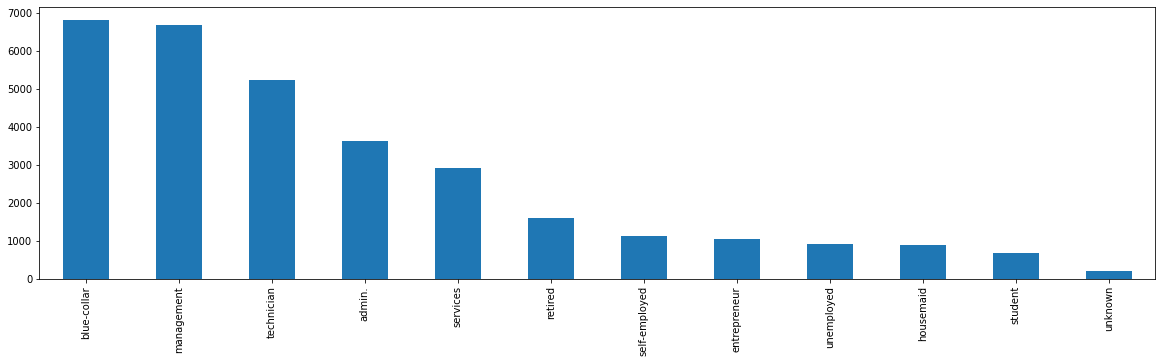

In [20]:
df.job_type.value_counts().plot(kind='bar', figsize = (20, 5))

In [21]:
# Checking job type in dependence of the customer age
df[['job_type', 'customer_age']].groupby(['job_type'], as_index=False).mean().sort_values(by= 'customer_age')

,job_type,customer_age
8,student,25.993856
7,services,38.294979
0,admin.,38.779528
9,technician,38.851787
1,blue-collar,39.532147
6,self-employed,39.726776
4,management,39.978978
10,unemployed,40.245198
2,entrepreneur,41.812871
3,housemaid,45.860412


<AxesSubplot:xlabel='job_type'>

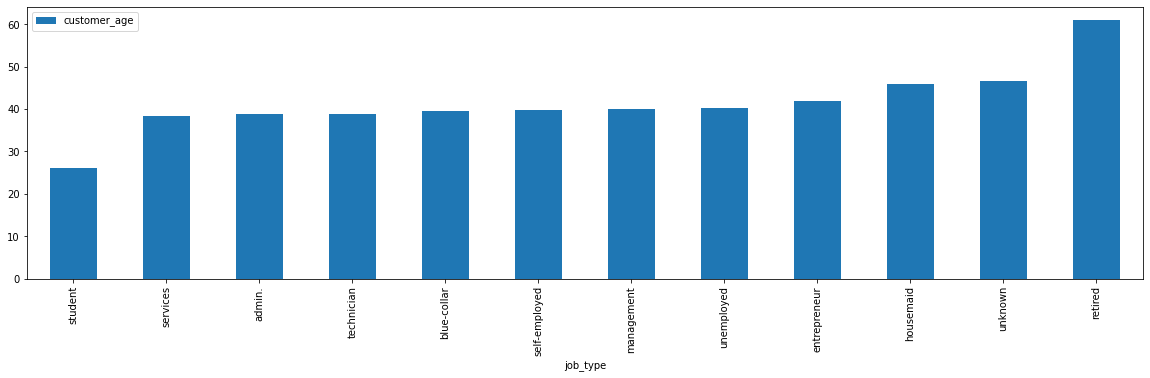

In [22]:
df[['job_type', 'customer_age']].groupby(['job_type'], as_index=False).mean().sort_values(by= 'customer_age').plot(x = 'job_type', kind='bar', figsize = (20, 5))

In [23]:
# Checking job type in dependence of the customer balance
df[['job_type', 'balance']].groupby(['job_type'], as_index=False).mean().sort_values(by= 'balance')

,job_type,balance
7,services,1009.418975
1,blue-collar,1080.589381
0,admin.,1104.723714
9,technician,1232.886906
8,student,1396.159265
3,housemaid,1425.318956
10,unemployed,1475.243820
2,entrepreneur,1624.337221
11,unknown,1631.591837
6,self-employed,1681.517711


<AxesSubplot:xlabel='job_type'>

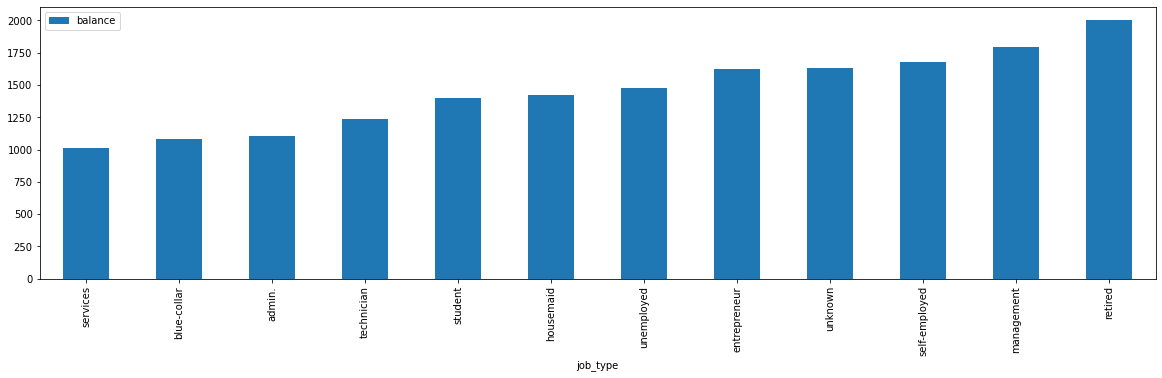

In [24]:
df[['job_type', 'balance']].groupby(['job_type'], as_index=False).mean().sort_values(by= 'balance').plot(x = 'job_type', kind='bar', figsize = (20, 5))

In [25]:
# Transform unknown labels to NaN
df.job_type[df.job_type == 'unknown'] = np.nan
df.job_type.value_counts()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
Name: job_type, dtype: int64

In [26]:
# Encoding jobs
job_encoder = LabelEncoder()
df.job_type[df.job_type.notnull()] = job_encoder.fit_transform(df.job_type[df.job_type.notnull()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<br><br>

### Marital

Feature description: <br>
- Marital Status of the Customer

In [27]:
df.marital.head()

0     single
1    married
2    married
3     single
4    married
Name: marital, dtype: object

In [28]:
df.marital.isnull().sum()

150

In [29]:
df.marital.value_counts()

married     18945
single       8857
divorced     3695
Name: marital, dtype: int64

<AxesSubplot:>

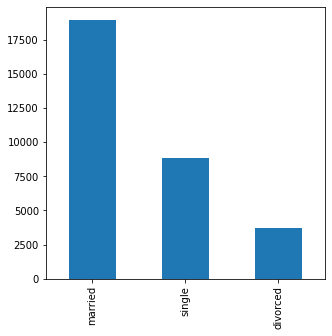

In [30]:
df.marital.value_counts().plot(kind = 'bar', figsize = (5, 5))

<AxesSubplot:xlabel='marital'>

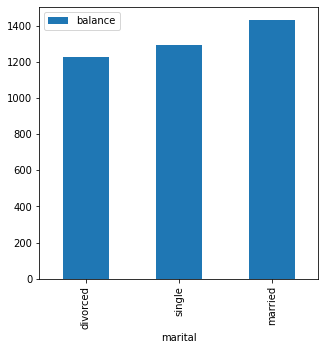

In [31]:
df[['marital', 'balance']].groupby(['marital'], as_index=False).mean().sort_values(by= 'balance').plot(x = 'marital', kind='bar', figsize = (5, 5))

In [32]:
# Encoding marital
marital_encoder = LabelEncoder()
df.marital[df.marital.notnull()] = marital_encoder.fit_transform(df.marital[df.marital.notnull()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<br><br>

### Education

Feature description:
- Education Level of the Customer

In [33]:
df.education.head()

0     tertiary
1    secondary
2    secondary
3    secondary
4      primary
Name: education, dtype: object

In [34]:
df.education.isnull().sum()

0

In [35]:
df.education.value_counts()

secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: education, dtype: int64

<AxesSubplot:>

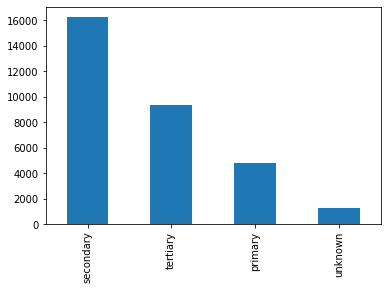

In [36]:
df.education.value_counts().plot(kind='bar')

In [37]:
df[['education', 'balance']].groupby(['education'], as_index=False).mean().sort_values(by= 'balance')

,education,balance
1,secondary,1154.057936
0,primary,1268.186613
3,unknown,1531.740188
2,tertiary,1769.029941


<AxesSubplot:xlabel='education'>

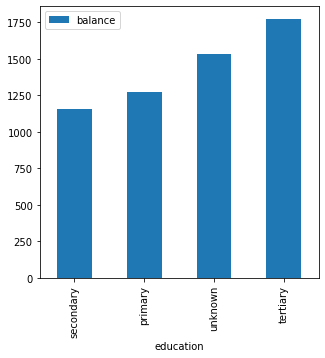

In [38]:
df[['education', 'balance']].groupby(['education'], as_index=False).mean().sort_values(by= 'balance').plot(x = 'education', kind='bar', figsize = (5, 5))

<br><br>

In [39]:
df.education[df.education == 'unknown'] = np.nan
df.education.isnull().sum()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1292

In [40]:
# Encoding education
education_encoder = LabelEncoder()
df.education[df.education.notnull()] = education_encoder.fit_transform(df.education[df.education.notnull()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<br><br>

### Default

Feature description:
- Whether customer has Defaulted in Past

In [41]:
df.default.head()

0    no
1    no
2    no
3    no
4    no
Name: default, dtype: object

In [42]:
df.default.isnull().sum()

0

In [43]:
df.default.value_counts()

no     31094
yes      553
Name: default, dtype: int64

<AxesSubplot:>

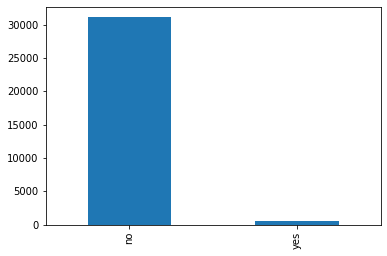

In [44]:
df.default.value_counts().plot(kind='bar')

In [45]:
# Encoding default
default_encoder = LabelEncoder()
df.default[df.default.notnull()] = default_encoder.fit_transform(df.default[df.default.notnull()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<br><br>

### Balance

Feature description:
- Current Balance in the Customer's Bank

In [46]:
df.balance.head()

0     285.0
1     934.0
2     656.0
3       2.0
4    1352.0
Name: balance, dtype: float64

In [47]:
df.balance.isnull().sum()

399

In [48]:
df.balance.describe()

count     31248.000000
mean       1368.112615
std        3085.342417
min       -8020.000000
25%          72.000000
50%         449.000000
75%        1413.000000
max      102128.000000
Name: balance, dtype: float64

<AxesSubplot:>

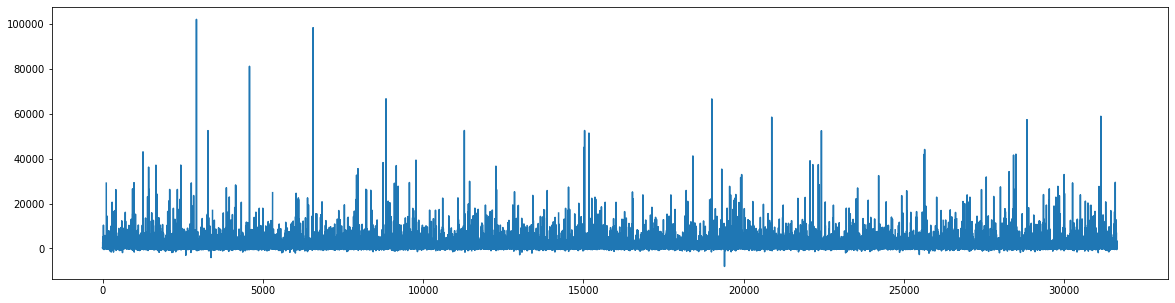

In [49]:
df.balance.plot(figsize=(20, 5))

<br><br>

### Housing Loan

Feature description:
- Has customer taken a Housing Loan

In [50]:
df.housing_loan.head()

0    yes
1     no
2     no
3    yes
4    yes
Name: housing_loan, dtype: object

In [51]:
df.housing_loan.isnull().sum()

0

In [52]:
df.housing_loan.value_counts()

yes    17700
no     13947
Name: housing_loan, dtype: int64

<AxesSubplot:>

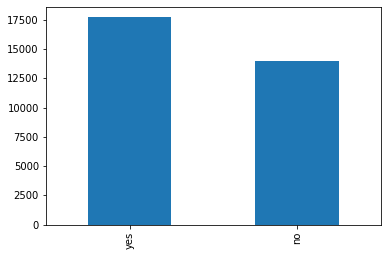

In [53]:
df.housing_loan.value_counts().plot(kind='bar')

In [54]:
# Encoding housing_loan
housing_loan_encoder = LabelEncoder()
df.housing_loan = housing_loan_encoder.fit_transform(df.housing_loan)

<br><br>

### Personal Loan

Feature description:
- Has customer taken a Personal Loan

In [55]:
df.personal_loan.head()

0     no
1    yes
2     no
3     no
4     no
Name: personal_loan, dtype: object

In [56]:
df.personal_loan.isnull().sum()

149

In [57]:
df.personal_loan.value_counts()

no     26463
yes     5035
Name: personal_loan, dtype: int64

<AxesSubplot:>

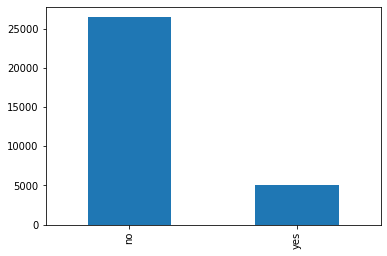

In [58]:
df.personal_loan.value_counts().plot(kind='bar')

In [59]:
# Encoding personal_loan
personal_loan_encoder = LabelEncoder()
df.personal_loan[df.personal_loan.notnull()] = personal_loan_encoder.fit_transform(df.personal_loan[df.personal_loan.notnull()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<br><br>

### Communication Type

Feature description:
- Type of communication made by the bank with the customer

In [60]:
df.communication_type.head()

0     unknown
1    cellular
2    cellular
3     unknown
4    cellular
Name: communication_type, dtype: object

In [61]:
df.communication_type.isnull().sum()

0

In [62]:
df.communication_type.value_counts()

cellular     20480
unknown       9151
telephone     2016
Name: communication_type, dtype: int64

<AxesSubplot:>

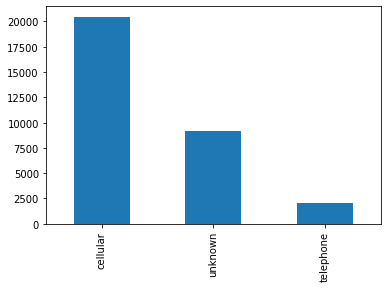

In [63]:
df.communication_type.value_counts().plot(kind='bar')

In [64]:
# Transform unknown data to NaN
df.communication_type[df.communication_type == 'unknown'] = np.nan

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
# Encoding communication_type
communication_type_encoder = LabelEncoder()
df.communication_type[df.communication_type.notnull()] = communication_type_encoder.fit_transform(df.communication_type[df.communication_type.notnull()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<br><br>

### Day of month

Feature description :
- Day of month of the last contact made with customer

In [66]:
df.day_of_month.head()

0    26
1    18
2     5
3    20
4    13
Name: day_of_month, dtype: int64

In [67]:
df.day_of_month.isnull().sum()

0

In [68]:
df.day_of_month.describe()

count    31647.000000
mean        15.818561
std          8.322970
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day_of_month, dtype: float64

<AxesSubplot:>

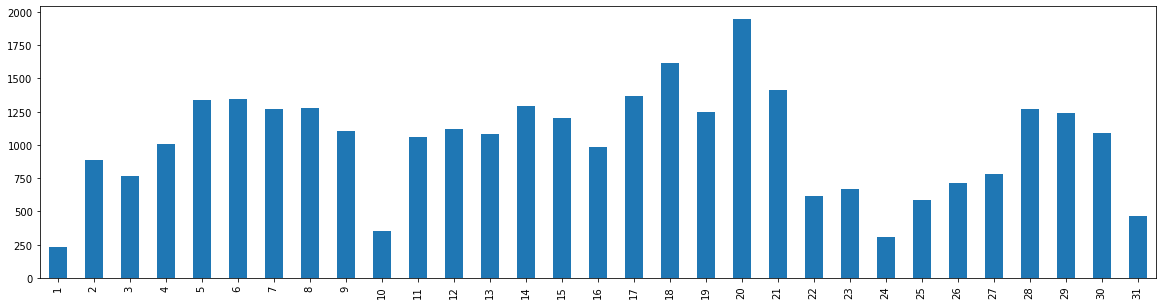

In [69]:
df.day_of_month.value_counts().sort_index().plot(kind='bar', figsize=(20,5))

In [70]:
df.day_of_month = df.day_of_month.astype('int', errors='ignore')

<br><br>

### Month

Feature descrption:
- Month for the last contact made with customer

In [71]:
df.month.head()

0    jun
1    nov
2    feb
3    may
4    may
Name: month, dtype: object

In [72]:
df.month.isnull().sum()

0

In [73]:
df.month.value_counts()

may    9685
jul    4786
aug    4308
jun    3746
nov    2801
apr    2111
feb    1836
jan     953
oct     510
sep     417
mar     338
dec     156
Name: month, dtype: int64

<AxesSubplot:>

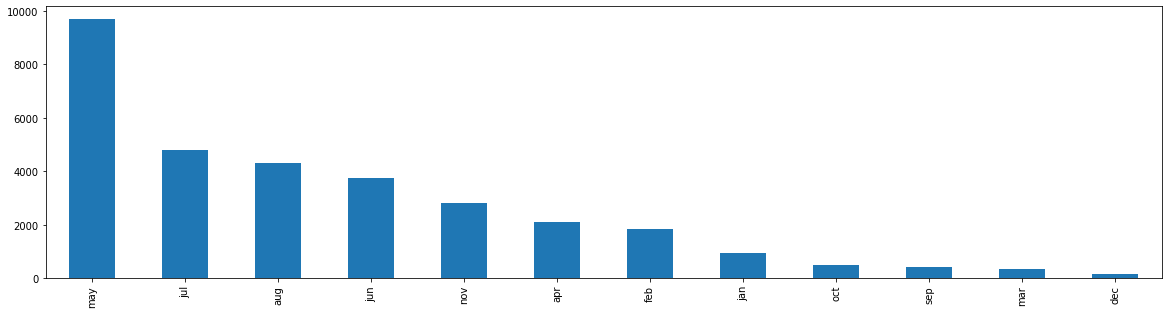

In [74]:
df.month.value_counts().plot(kind='bar', figsize=(20, 5))

In [75]:
# Encoding month
month_encoder = LabelEncoder()
df.month = month_encoder.fit_transform(df.month)

<br><br>

### Last Contact Duration

Feature description:
- Last Contact duration made with the customer (in seconds)

In [76]:
df.last_contact_duration.head()

0    303.0
1    143.0
2    101.0
3    127.0
4     49.0
Name: last_contact_duration, dtype: float64

In [77]:
df.last_contact_duration.isnull().sum()

311

In [78]:
df.last_contact_duration.describe()

count    31336.000000
mean       256.184038
std        256.181479
min          0.000000
25%        103.000000
50%        179.000000
75%        315.250000
max       4900.000000
Name: last_contact_duration, dtype: float64

In [79]:
# Check customers with contact duration = 0 XDDD
df.last_contact_duration[df.last_contact_duration == 0]

427      0.0
1594     0.0
2066     0.0
2152     0.0
2262     0.0
        ... 
30887    0.0
31030    0.0
31035    0.0
31135    0.0
31211    0.0
Name: last_contact_duration, Length: 197, dtype: float64

<AxesSubplot:>

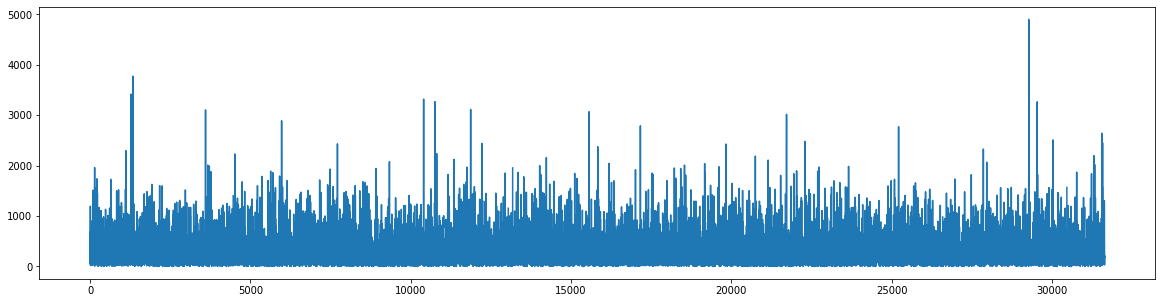

In [80]:
df.last_contact_duration.plot(figsize=(20,5))

<br><br>

### Num contacts in campaign

Feature description:
- Number of contacts made with the customer during the current campaign.

In [81]:
df.num_contacts_in_campaign.head()

0    4.0
1    2.0
2    4.0
3    3.0
4    2.0
Name: num_contacts_in_campaign, dtype: float64

In [82]:
df.num_contacts_in_campaign.isnull().sum()

112

In [83]:
df.num_contacts_in_campaign.describe()

count    31535.000000
mean         2.776629
std          3.153293
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_contacts_in_campaign, dtype: float64

In [84]:
df.num_contacts_in_campaign[df.num_contacts_in_campaign % 1 != 0].sum()

0.0

<AxesSubplot:>

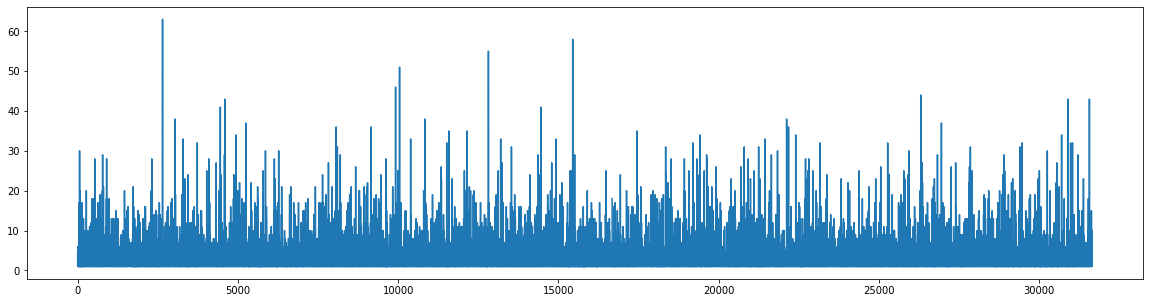

In [85]:
df.num_contacts_in_campaign.plot(figsize=(20,5))

In [86]:
df.num_contacts_in_campaign = df.num_contacts_in_campaign.astype('int', errors='ignore')

<br><br>

### Prev Campaign Outcome

Feature description:
- Success or Failure in previous Campaign.

In [87]:
df.prev_campaign_outcome.head()

0    unknown
1      other
2    unknown
3    unknown
4    unknown
Name: prev_campaign_outcome, dtype: object

In [88]:
df.prev_campaign_outcome.isnull().sum()

0

In [89]:
df.prev_campaign_outcome.value_counts()

unknown    25833
failure     3472
other       1272
success     1070
Name: prev_campaign_outcome, dtype: int64

In [90]:
df.prev_campaign_outcome[df.prev_campaign_outcome == 'unknown'] = np.nan

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df.prev_campaign_outcome.isnull().sum()

25833

In [92]:
# Check procent of non NaN values
df.prev_campaign_outcome.notnull().sum() / len(df.prev_campaign_outcome)

0.18371409612285525

### Conclusion
- 82% of data in this column is NaN

In [93]:
df.drop(columns=['prev_campaign_outcome'], inplace=True)

<br><br>

### Days Since Prev Campaign Contact  

Feature description:
- Number of days passed since customer was contacted in previous campaign.

In [94]:
df.days_since_prev_campaign_contact.head()

0      NaN
1    132.0
2      NaN
3      NaN
4      NaN
Name: days_since_prev_campaign_contact, dtype: float64

In [95]:
df.days_since_prev_campaign_contact.isnull().sum()

25831

In [96]:
df.days_since_prev_campaign_contact.describe()

count    5816.000000
mean      224.995186
std       114.991828
min         1.000000
25%       133.000000
50%       195.000000
75%       329.000000
max       871.000000
Name: days_since_prev_campaign_contact, dtype: float64

In [97]:
df.days_since_prev_campaign_contact.notnull().sum() / len(df.days_since_prev_campaign_contact)

0.18377729326634437

### Conclusion:
- 82% of value are NaN in this column

In [98]:
df.drop(columns=['days_since_prev_campaign_contact'], inplace = True)

<br><br>

### Num Contacts Prev Campaign 

Feature description:
- Number of contacts made with the customer during the previous campaign.

In [99]:
df.num_contacts_prev_campaign.head()

0    0
1    1
2    0
3    0
4    0
Name: num_contacts_prev_campaign, dtype: int64

In [100]:
df.num_contacts_prev_campaign.isnull().sum()

0

In [101]:
df.num_contacts_prev_campaign.describe()

count    31647.000000
mean         0.591620
std          2.499675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: num_contacts_prev_campaign, dtype: float64

<AxesSubplot:>

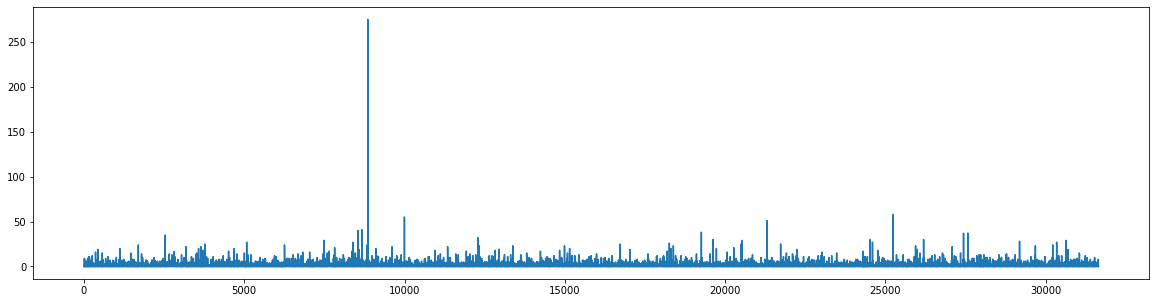

In [102]:
df.num_contacts_prev_campaign.plot(figsize=(20,5))

<br><br>

### Term Deposit Subscribed

Feature description:
- (Target) Has the customer taken a term deposit ?

In [103]:
df.term_deposit_subscribed.head()

0    0
1    0
2    0
3    0
4    0
Name: term_deposit_subscribed, dtype: int64

In [104]:
df.term_deposit_subscribed.isnull().sum()

0

In [105]:
df.term_deposit_subscribed.value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:>

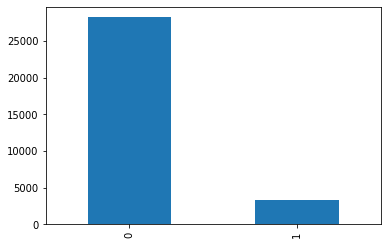

In [106]:
df.term_deposit_subscribed.value_counts().plot(kind='bar')

In [107]:
df.term_deposit_subscribed = df.term_deposit_subscribed.astype('int', errors='ignore')

<br><br>

## Data Imputing

In [108]:
from sklearn.impute import KNNImputer 

In [109]:
imputer = KNNImputer(n_neighbors=10)

In [110]:
imputed_data = imputer.fit_transform(df)

In [111]:
dataframe = pd.DataFrame(data = imputed_data,
                         columns= df.columns)

In [112]:
dataframe

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,6.0,303.0,4.0,0.0,0.0
1,34.0,1.0,1.0,1.0,0.0,934.0,0.0,1.0,0.0,18.0,9.0,143.0,2.0,1.0,0.0
2,46.0,9.0,1.0,1.0,0.0,656.0,0.0,0.0,0.0,5.0,3.0,101.0,4.0,0.0,0.0
3,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,0.1,20.0,8.0,127.0,3.0,0.0,0.0
4,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,3.0,0.0
31643,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,0.2,20.0,6.0,31.0,7.0,0.0,0.0
31644,41.0,10.0,1.0,0.0,0.0,242.0,1.0,0.0,0.2,23.0,8.0,89.0,2.0,0.0,0.0
31645,48.0,7.0,1.0,1.0,0.0,2699.0,0.0,0.0,0.0,11.0,1.0,216.0,6.0,0.0,0.0


In [113]:
dataframe.isnull().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
term_deposit_subscribed       0
dtype: int64

<br><br>

## Outliers cleaning

#### Elliptic Envelope model

In [114]:
from sklearn.covariance import EllipticEnvelope

In [115]:
eliptic_model=EllipticEnvelope()

In [116]:
dataframe['outlier_grade']= pd.Series(eliptic_model.fit_predict(dataframe.values))

In [117]:
dataframe[dataframe.outlier_grade != 1]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,outlier_grade
13,50.0,4.0,1.0,1.0,0.0,4873.0,0.0,0.0,1.0,6.0,3.0,381.0,6.0,9.0,0.0,-1
51,40.0,1.0,2.0,0.0,0.0,3380.0,1.0,0.0,1.0,20.0,9.0,46.0,1.0,0.0,0.0,-1
63,45.0,9.0,2.0,2.0,0.0,3428.0,1.0,0.0,0.0,25.0,5.0,72.0,30.0,0.0,0.0,-1
69,55.0,4.0,1.0,0.0,0.0,10.0,0.0,0.0,1.0,19.0,10.0,258.0,2.0,0.0,0.0,-1
71,40.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,31.0,5.0,25.0,20.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31588,55.0,3.0,0.0,1.1,0.0,598.0,0.0,0.0,1.0,31.0,5.0,90.0,2.0,0.0,0.0,-1
31589,57.0,4.0,0.0,2.0,0.0,29484.0,0.0,0.0,0.0,20.0,9.0,132.0,2.0,0.0,0.0,-1
31591,55.0,1.0,1.0,1.0,0.0,347.0,1.0,0.0,1.0,22.0,5.0,592.0,1.0,0.0,0.0,-1
31607,37.0,4.0,1.0,2.0,0.0,12857.0,1.0,0.0,0.0,30.0,8.0,419.0,1.0,0.0,0.0,-1


From 31646 rows remained 3165

In [118]:
dataframe.drop(columns=['outlier_grade'], inplace=True)

<br><br>

#### One Class SVM Model

In [119]:
from sklearn.svm import OneClassSVM
svm_model=OneClassSVM(gamma='auto')

In [120]:
dataframe['ocs']=pd.Series(svm_model.fit_predict(dataframe.values))

In [121]:
dataframe[dataframe.ocs!=1]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,ocs
0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,6.0,303.0,4.0,0.0,0.0,-1
3,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,0.1,20.0,8.0,127.0,3.0,0.0,0.0,-1
4,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,0.0,0.0,-1
5,65.0,5.0,1.0,0.0,0.0,2880.0,0.0,0.0,0.0,23.0,0.0,163.0,1.0,0.0,1.0,-1
6,57.0,1.0,1.0,0.0,0.0,495.0,0.0,0.0,0.0,18.0,1.0,687.0,4.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31638,28.0,2.0,1.0,1.0,0.0,2023.4,1.0,0.0,0.1,27.0,8.0,1303.0,1.0,0.0,0.0,-1
31641,26.0,9.0,2.0,1.0,0.0,459.0,0.0,0.0,0.0,29.0,4.0,237.0,1.0,8.0,0.0,-1
31642,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,3.0,0.0,-1
31643,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,0.2,20.0,6.0,31.0,7.0,0.0,0.0,-1


From 31646 rows remained 21626

In [122]:
dataframe.drop(columns=['ocs'], inplace=True)

<br><br>

#### Local Outlier Factor Model

In [123]:
from sklearn.neighbors import LocalOutlierFactor
local_model=LocalOutlierFactor()

In [124]:
dataframe['lof']=pd.Series(local_model.fit_predict(dataframe.values))

In [125]:
dataframe[dataframe.lof!=1]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,lof
229,48.0,1.0,1.0,0.0,0.0,7096.0,0.0,0.0,0.0,6.0,1.0,1461.0,7.0,0.0,1.0,-1
534,27.0,0.0,1.0,1.0,1.0,-943.0,1.0,0.0,0.0,3.0,6.0,457.0,1.0,0.0,0.0,-1
778,81.0,5.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,27.0,9.0,65.0,3.0,0.0,0.0,-1
782,59.0,5.0,2.0,1.0,0.0,409.0,0.0,1.0,0.0,31.0,5.0,51.0,29.0,0.0,0.0,-1
1114,25.0,0.0,2.0,1.0,0.0,2294.0,1.0,0.0,0.0,18.0,8.0,2298.0,1.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31208,40.0,0.0,1.0,1.0,0.0,14964.0,0.0,0.0,0.0,23.0,5.0,1353.0,4.0,0.0,1.0,-1
31310,63.0,4.0,1.0,2.0,0.0,5114.0,0.0,0.0,1.0,13.0,9.0,2198.0,2.0,3.0,1.0,-1
31337,55.0,9.0,1.0,1.0,0.0,-318.0,0.0,1.0,0.0,10.0,5.0,2020.0,1.0,0.0,1.0,-1
31413,29.0,9.0,2.0,1.0,0.0,-21.0,1.0,0.0,0.0,20.0,1.0,226.0,2.0,0.0,0.0,-1


From 31646 rows remained 206

In [126]:
dataframe.drop(columns=['lof'], inplace=True)

<br><br>

#### Isolation Forest Model

In [127]:
from sklearn.ensemble import IsolationForest
forest_model=IsolationForest()

In [128]:
dataframe['iso']=pd.Series(forest_model.fit_predict(dataframe.values))

In [129]:
dataframe[dataframe.iso != -1]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,iso
0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,6.0,303.0,4.0,0.0,0.0,1
1,34.0,1.0,1.0,1.0,0.0,934.0,0.0,1.0,0.0,18.0,9.0,143.0,2.0,1.0,0.0,1
2,46.0,9.0,1.0,1.0,0.0,656.0,0.0,0.0,0.0,5.0,3.0,101.0,4.0,0.0,0.0,1
3,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,0.1,20.0,8.0,127.0,3.0,0.0,0.0,1
4,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,3.0,0.0,1
31643,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,0.2,20.0,6.0,31.0,7.0,0.0,0.0,1
31644,41.0,10.0,1.0,0.0,0.0,242.0,1.0,0.0,0.2,23.0,8.0,89.0,2.0,0.0,0.0,1
31645,48.0,7.0,1.0,1.0,0.0,2699.0,0.0,0.0,0.0,11.0,1.0,216.0,6.0,0.0,0.0,1


From 31646 rows remained 26088

In [130]:
dataframe = dataframe[dataframe.iso != -1]

In [131]:
dataframe.drop(columns=['iso'], inplace = True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
dataframe.reset_index(inplace = True)
dataframe

,index,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,6.0,303.0,4.0,0.0,0.0
1,1,34.0,1.0,1.0,1.0,0.0,934.0,0.0,1.0,0.0,18.0,9.0,143.0,2.0,1.0,0.0
2,2,46.0,9.0,1.0,1.0,0.0,656.0,0.0,0.0,0.0,5.0,3.0,101.0,4.0,0.0,0.0
3,3,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,0.1,20.0,8.0,127.0,3.0,0.0,0.0
4,4,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,31642,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,3.0,0.0
26392,31643,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,0.2,20.0,6.0,31.0,7.0,0.0,0.0
26393,31644,41.0,10.0,1.0,0.0,0.0,242.0,1.0,0.0,0.2,23.0,8.0,89.0,2.0,0.0,0.0
26394,31645,48.0,7.0,1.0,1.0,0.0,2699.0,0.0,0.0,0.0,11.0,1.0,216.0,6.0,0.0,0.0


<br><br>

### Features Correlation

In [133]:
dataframe.corr()

,index,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
index,1.000000,-0.002655,0.001633,0.004840,-0.001592,0.003562,0.010994,-0.002971,0.002991,-0.004611,-0.004431,-0.003345,-0.004132,-0.009857,-0.001072,-0.009684
customer_age,-0.002655,1.000000,-0.022521,-0.384951,-0.136737,0.001205,0.084183,-0.163195,-0.006670,0.093234,-0.014395,-0.055911,-0.021693,0.012935,-0.022073,-0.006088
job_type,0.001633,-0.022521,1.000000,0.059074,0.183412,-0.000806,0.009535,-0.116563,-0.021189,-0.017275,0.024824,-0.088334,-0.000908,0.010342,-0.011836,0.031025
marital,0.004840,-0.384951,0.059074,1.000000,0.112284,-0.002987,-0.002291,-0.010522,-0.038437,-0.036939,-0.008616,-0.001347,0.013579,-0.014946,0.016160,0.047533
education,-0.001592,-0.136737,0.183412,0.112284,1.000000,-0.002614,0.064508,-0.100156,-0.019021,-0.052852,0.024410,-0.083650,-0.000162,0.021423,0.025621,0.082377
default,0.003562,0.001205,-0.000806,-0.002987,-0.002614,1.000000,-0.005774,0.008954,-0.004374,-0.002927,-0.003517,0.005195,-0.003244,-0.002435,-0.003431,-0.002334
balance,0.010994,0.084183,0.009535,-0.002291,0.064508,-0.005774,1.000000,-0.047364,-0.084990,-0.036457,0.010678,0.024561,-0.001459,-0.029378,-0.002733,-0.000174
housing_loan,-0.002971,-0.163195,-0.116563,-0.010522,-0.100156,0.008954,-0.047364,1.000000,0.044692,0.050156,-0.013767,0.303544,0.018051,-0.039626,0.082103,-0.130641
personal_loan,0.002991,-0.006670,-0.021189,-0.038437,-0.019021,-0.004374,-0.084990,0.044692,1.000000,-0.049510,0.014739,0.031516,-0.030890,-0.041508,-0.047400,-0.087984
communication_type,-0.004611,0.093234,-0.017275,-0.036939,-0.052852,-0.002927,-0.036457,0.050156,-0.049510,1.000000,-0.009936,0.117884,-0.063134,-0.003878,-0.074860,-0.057126


<AxesSubplot:>

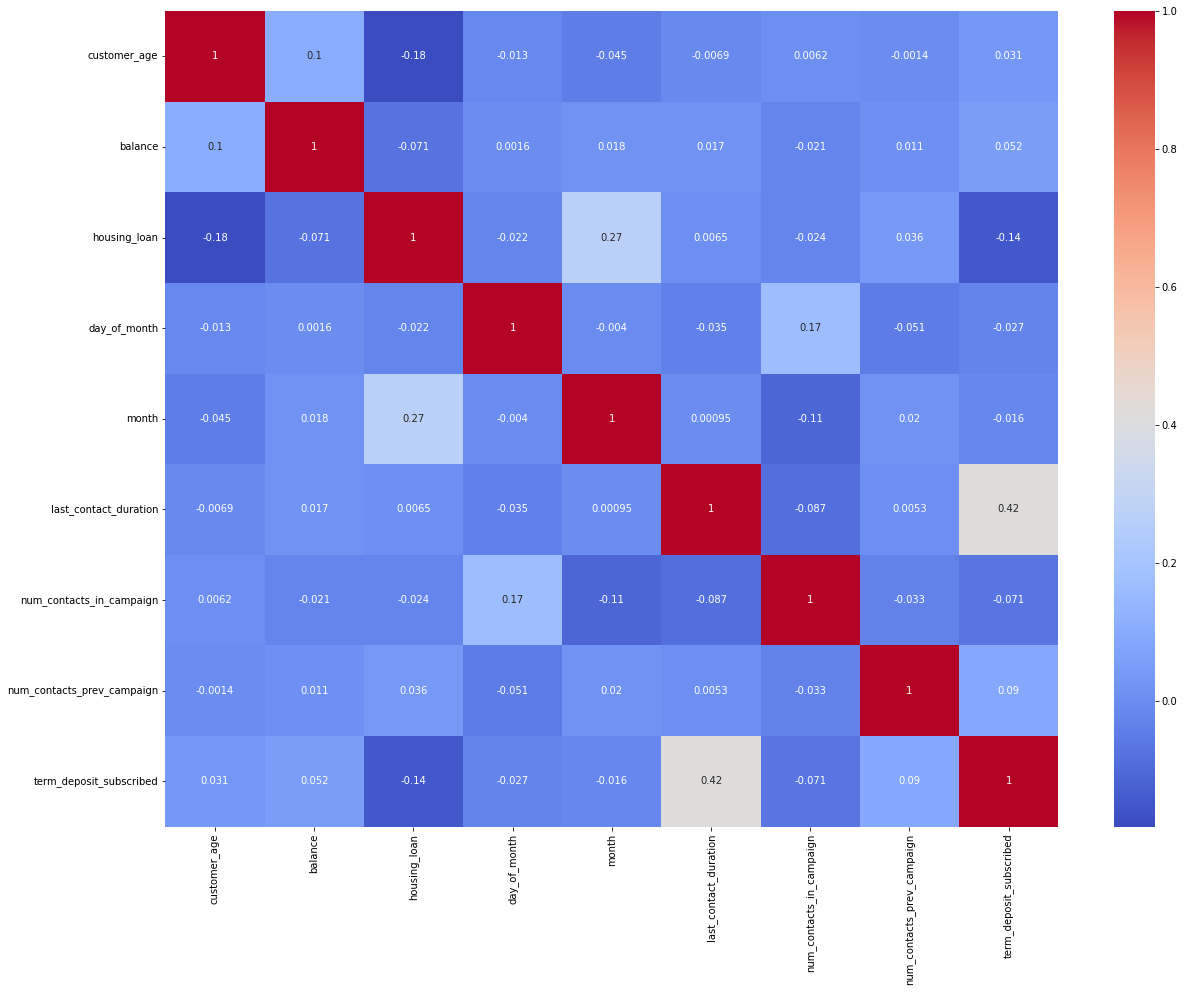

In [134]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [135]:
# Controlam corelatia dintre coloane mai mare ca 0.80
data = dataframe.corr()
data = data[abs(data) > 0.80].stack().reset_index()
data[data['level_0'] != data['level_1']]

,level_0,level_1,0


<br><br>

## Clustering

#### K-means algorithm

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [137]:
# X = dataframe[dataframe.columns[:-1]].values
# y = dataframe[dataframe.columns[-1]].values
X = dataframe.values

In [138]:
pca = PCA(n_components= 2)
X = pca.fit_transform(X)

In [139]:
x = X.copy()

For n_clusters = 2 The average silhouette_score is : 0.5894219553871947
For n_clusters = 3 The average silhouette_score is : 0.5277076850022453
For n_clusters = 4 The average silhouette_score is : 0.4844242960755408
For n_clusters = 5 The average silhouette_score is : 0.4512273697629258
For n_clusters = 6 The average silhouette_score is : 0.46462970078641014
For n_clusters = 7 The average silhouette_score is : 0.4376512576351843
For n_clusters = 8 The average silhouette_score is : 0.45100284740468916
For n_clusters = 9 The average silhouette_score is : 0.4278529848322524


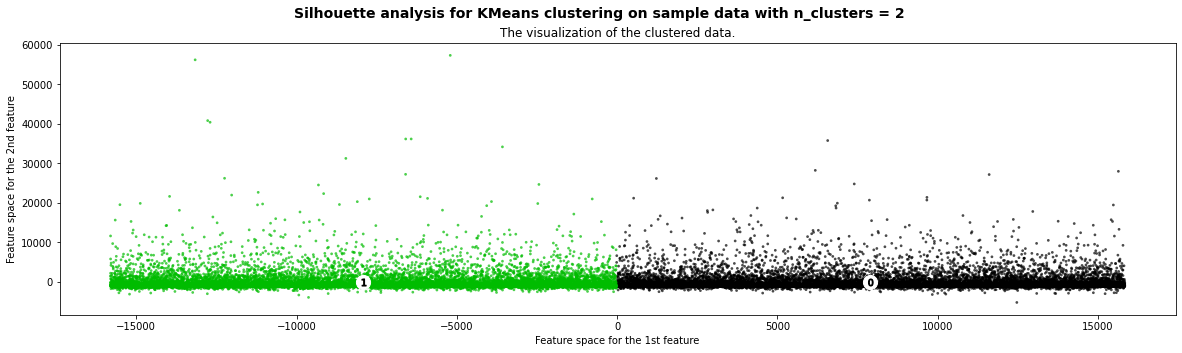

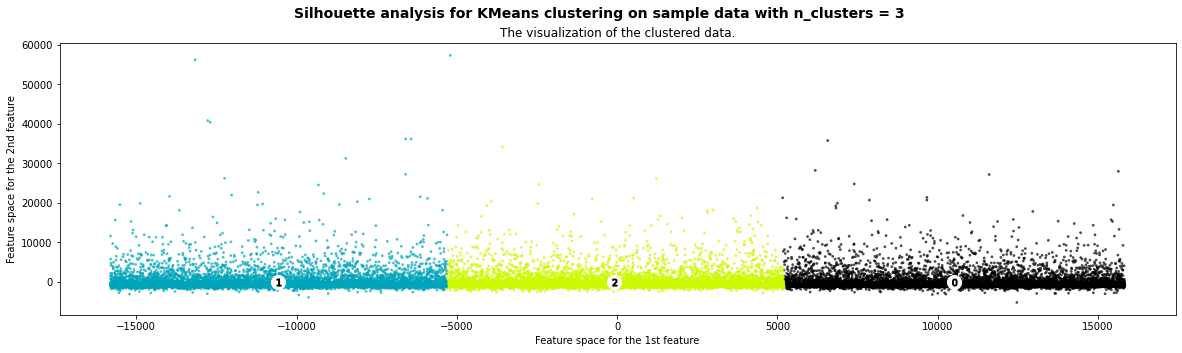

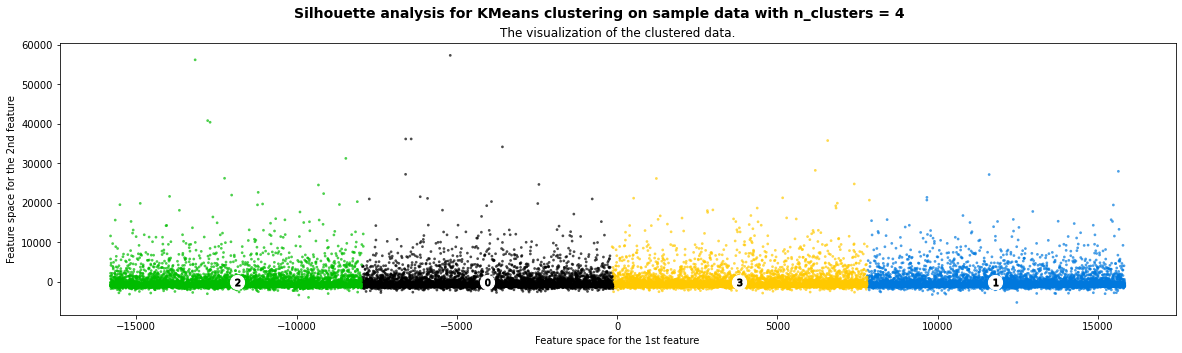

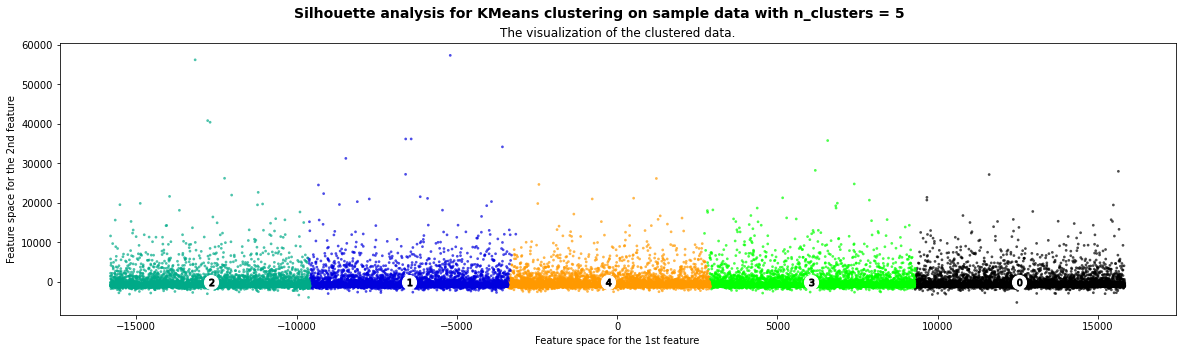

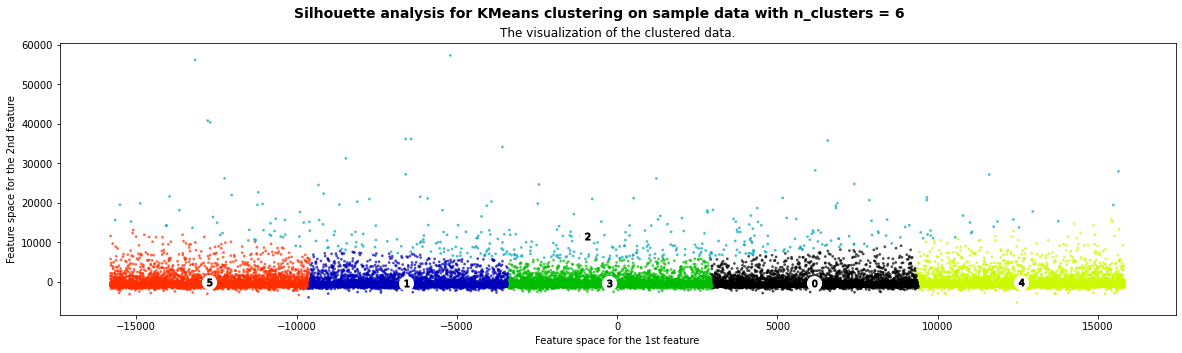

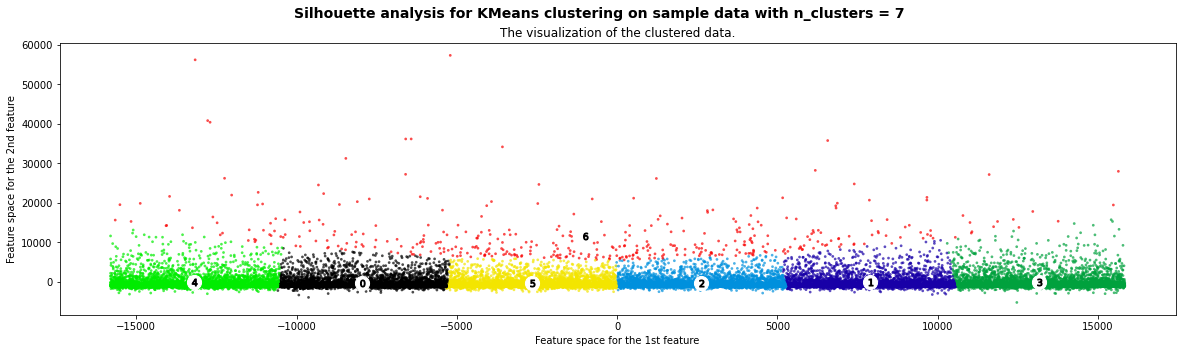

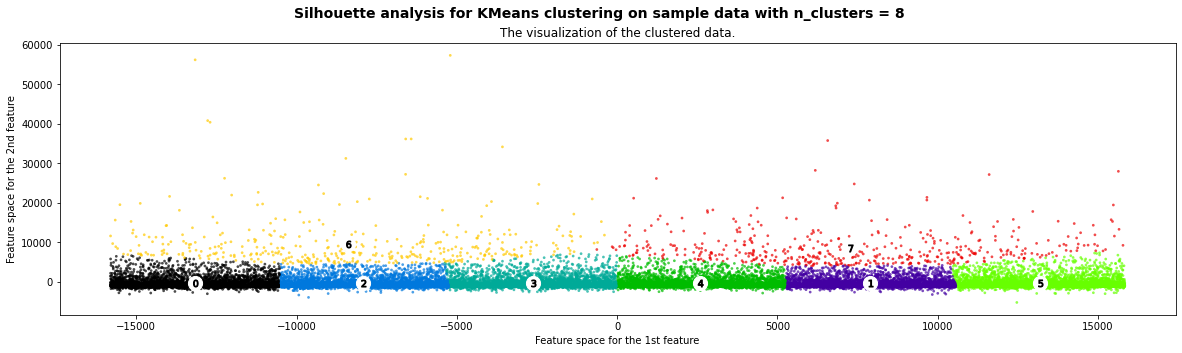

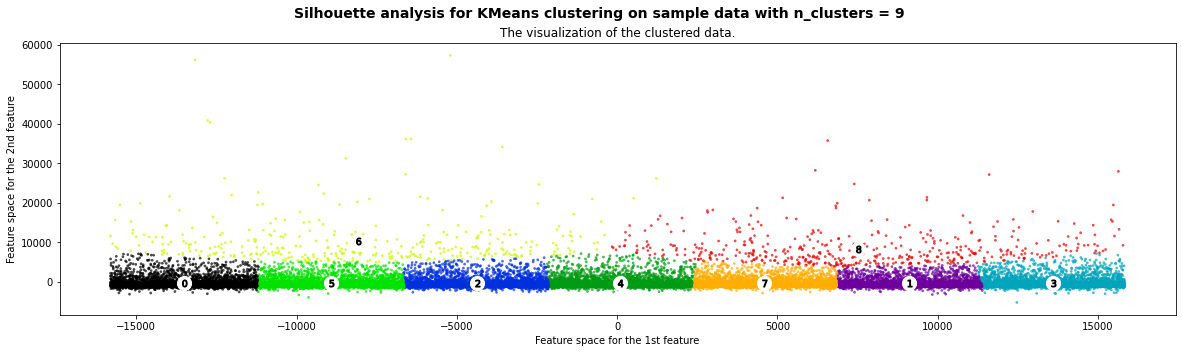

In [140]:
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:

    fig, ax2 = plt.subplots()
    fig.set_size_inches(20, 5)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    ax2.scatter( centers[:, 0], centers[:, 1],
        c="white", s=200
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

<br>The best result was shown by the model fitted on 2 clusters 

In [141]:
clusterer = KMeans(n_clusters=2, random_state=10)
dataframe['Kclass'] = pd.Series(clusterer.fit_predict(X))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
dataframe

,index,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,Kclass
0,0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,6.0,303.0,4.0,0.0,0.0,0
1,1,34.0,1.0,1.0,1.0,0.0,934.0,0.0,1.0,0.0,18.0,9.0,143.0,2.0,1.0,0.0,0
2,2,46.0,9.0,1.0,1.0,0.0,656.0,0.0,0.0,0.0,5.0,3.0,101.0,4.0,0.0,0.0,0
3,3,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,0.1,20.0,8.0,127.0,3.0,0.0,0.0,0
4,4,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,31642,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,3.0,0.0,1
26392,31643,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,0.2,20.0,6.0,31.0,7.0,0.0,0.0,1
26393,31644,41.0,10.0,1.0,0.0,0.0,242.0,1.0,0.0,0.2,23.0,8.0,89.0,2.0,0.0,0.0,1
26394,31645,48.0,7.0,1.0,1.0,0.0,2699.0,0.0,0.0,0.0,11.0,1.0,216.0,6.0,0.0,0.0,1


In [143]:
# centers = clusterer.cluster_centers_
print('The cluster centers are ', clusterer.cluster_centers_)

The cluster centers are  [[ 7.89054040e+03  4.07372068e+00]
 [-7.92289095e+03 -4.09042259e+00]]


<br>

#### Gaussian Mixture algorithm

In [144]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

For n_clusters = 2 The average silhouette_score is : 0.09379856004034434
For n_clusters = 3 The average silhouette_score is : -0.09491346688467024
For n_clusters = 4 The average silhouette_score is : 0.17804341412710423
For n_clusters = 5 The average silhouette_score is : -0.08415324422181865
For n_clusters = 6 The average silhouette_score is : -0.0020812188753435816
For n_clusters = 7 The average silhouette_score is : -0.03855456379966057
For n_clusters = 8 The average silhouette_score is : -0.03033292493124163
For n_clusters = 9 The average silhouette_score is : -0.12816430441207585


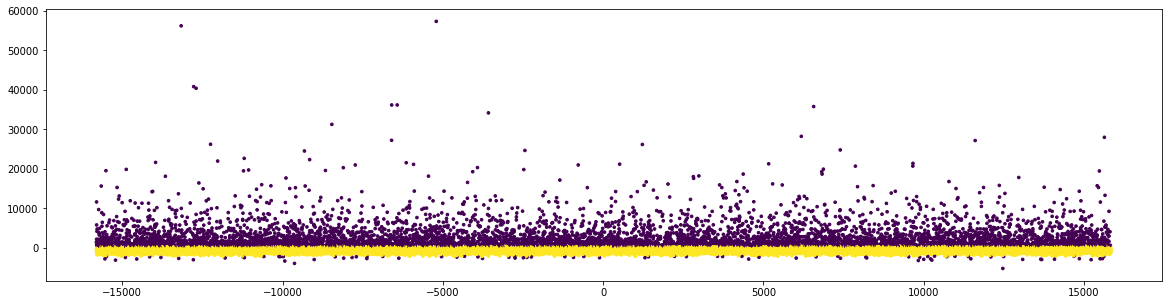

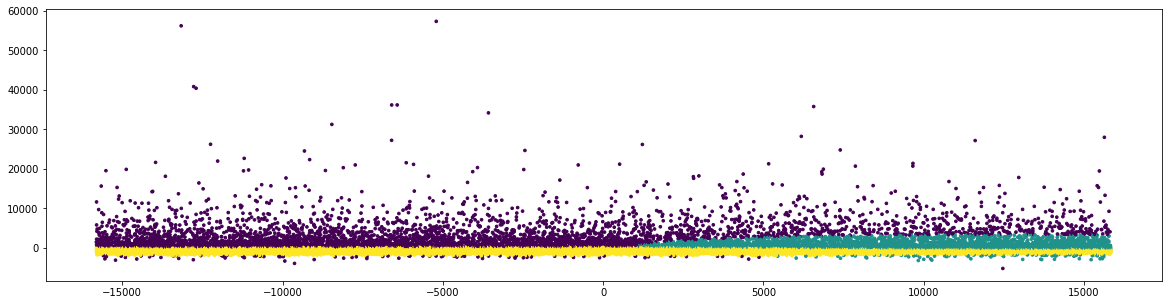

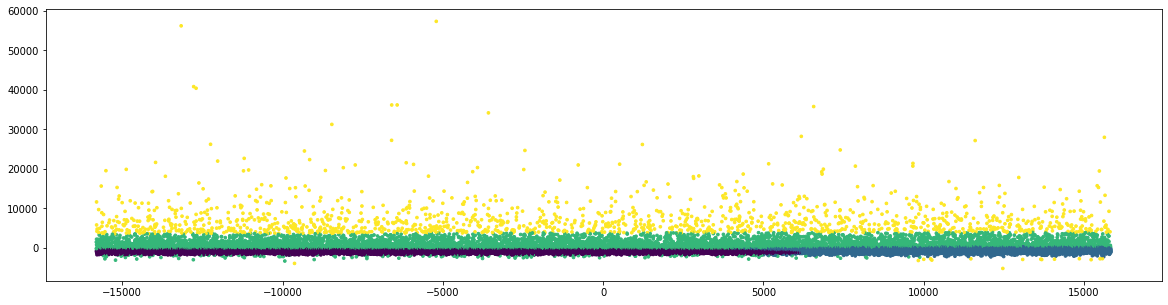

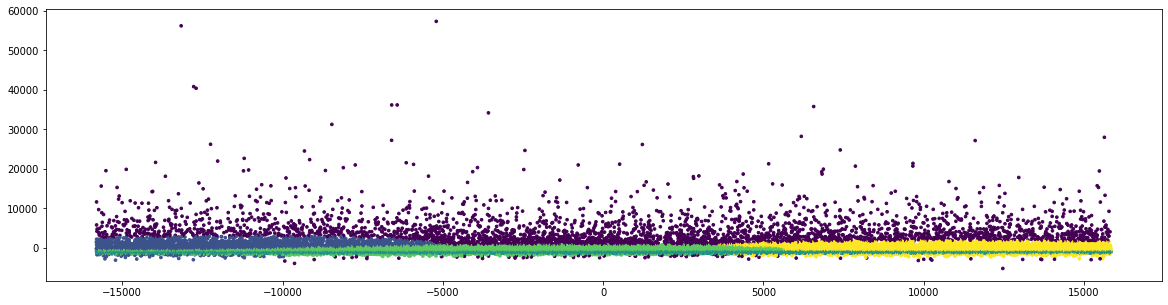

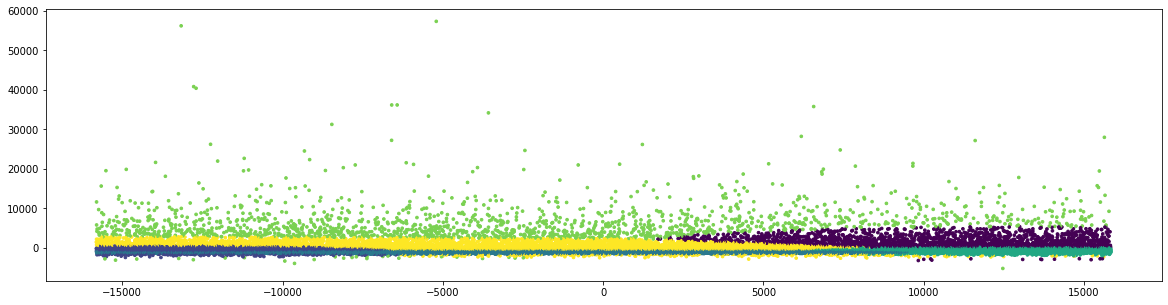

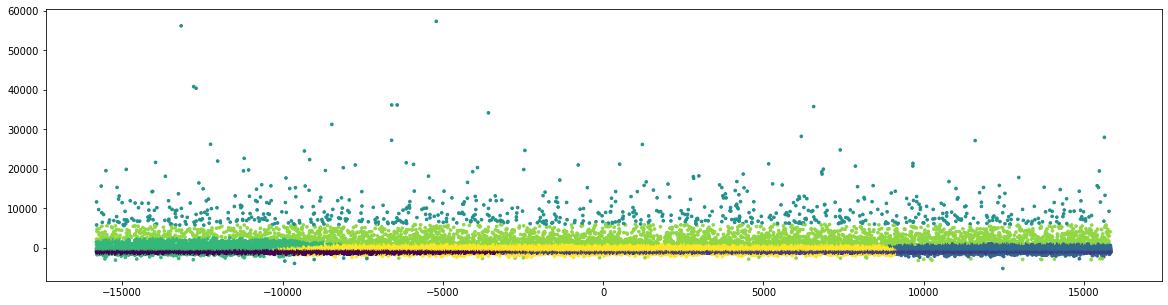

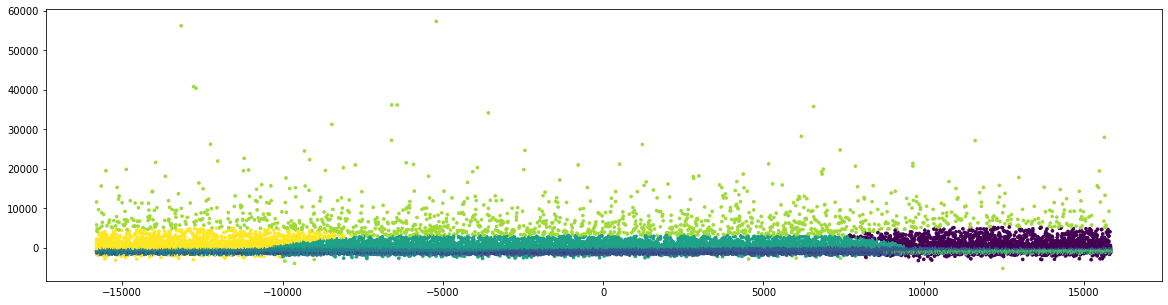

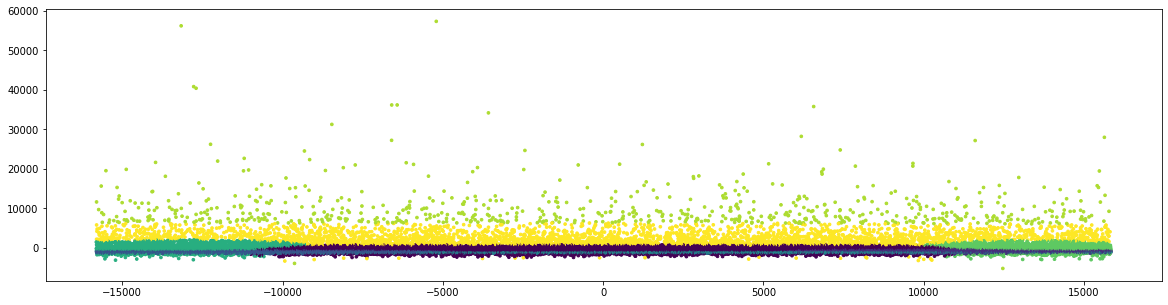

In [145]:
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:

    fig, ax2 = plt.subplots()
    fig.set_size_inches(20, 5)
    
    gmm = GaussianMixture(n_components=n_clusters).fit(X)
    labels = gmm.predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    ax2.scatter(X[:, 0], X[:, 1], c = labels, s = 7, cmap='viridis')

The best result was shown by the model fitted on 2 clusters

In [146]:
gmm = GaussianMixture(n_components=2).fit(X)
dataframe['GmmClass'] = pd.Series(gmm.predict(X))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
dataframe

,index,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,Kclass,GmmClass
0,0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,0.0,26.0,6.0,303.0,4.0,0.0,0.0,0,0
1,1,34.0,1.0,1.0,1.0,0.0,934.0,0.0,1.0,0.0,18.0,9.0,143.0,2.0,1.0,0.0,0,0
2,2,46.0,9.0,1.0,1.0,0.0,656.0,0.0,0.0,0.0,5.0,3.0,101.0,4.0,0.0,0.0,0,0
3,3,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,0.1,20.0,8.0,127.0,3.0,0.0,0.0,0,0
4,4,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,31642,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,3.0,0.0,1,0
26392,31643,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,0.2,20.0,6.0,31.0,7.0,0.0,0.0,1,0
26393,31644,41.0,10.0,1.0,0.0,0.0,242.0,1.0,0.0,0.2,23.0,8.0,89.0,2.0,0.0,0.0,1,0
26394,31645,48.0,7.0,1.0,1.0,0.0,2699.0,0.0,0.0,0.0,11.0,1.0,216.0,6.0,0.0,0.0,1,1


In [148]:
gmm.weights_

array([0.75128895, 0.24871105])

<br><br>

#### Hopkins Statistics

In [149]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [150]:
hopkins(dataframe)

0.9830887828781605